In [1]:
!pip install opencv-python-headless scikit-learn matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:00:010m


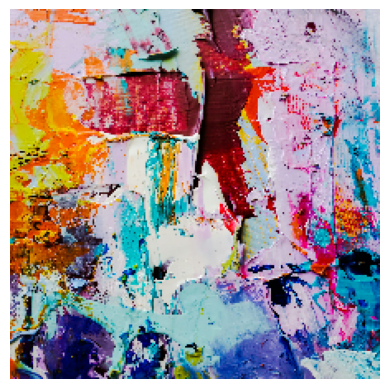

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("2.jpg")

# Convert from BGR (OpenCV default) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image for faster processing (optional)
image = cv2.resize(image, (224, 224))

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

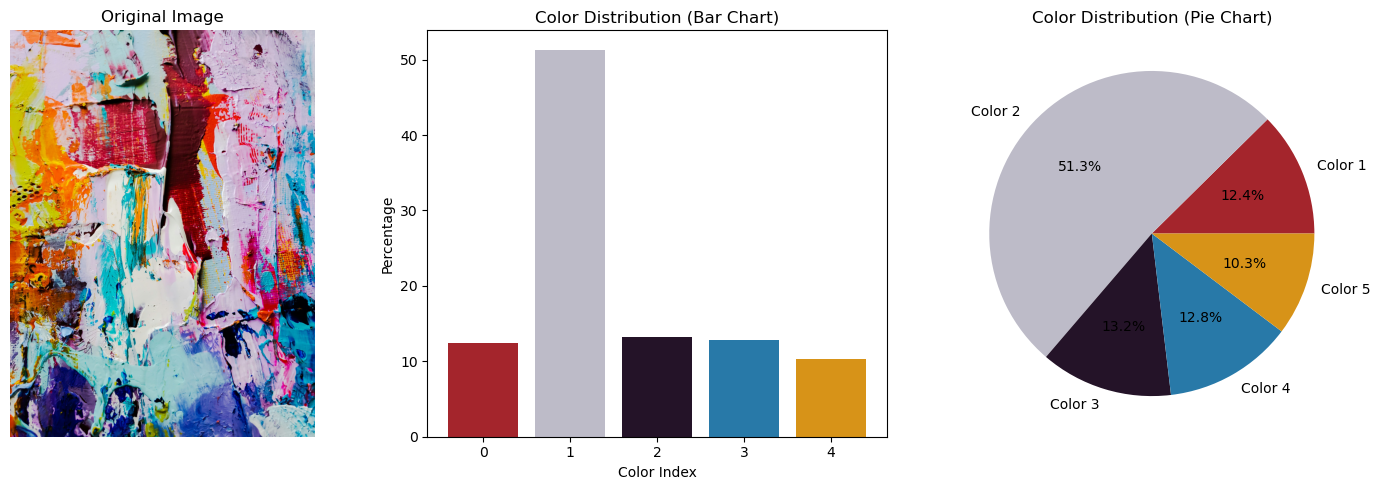

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread

# Load the image
image = imread("2.jpg")  # Replace with your image path
image = image[:, :, :3]  # Ensure it's RGB (ignore alpha channel if present)

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of dominant colors to extract
k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

# Get dominant colors and labels
dominant_colors = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

# Count pixels per cluster
counts = np.bincount(labels)

# Calculate the percentage of each color
percentages = (counts / counts.sum()) * 100

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the original image
axes[0].imshow(image)
axes[0].axis("off")
axes[0].set_title("Original Image")

# Plot the dominant colors as a bar chart
axes[1].bar(range(k), percentages, color=[color / 255 for color in dominant_colors])
axes[1].set_xlabel("Color Index")
axes[1].set_ylabel("Percentage")
axes[1].set_title("Color Distribution (Bar Chart)")

# Plot the dominant colors as a pie chart
axes[2].pie(
    percentages,
    colors=[color / 255 for color in dominant_colors],
    labels=[f"Color {i+1}" for i in range(k)],
    autopct="%1.1f%%"
)
axes[2].set_title("Color Distribution (Pie Chart)")

# Show the plots
plt.tight_layout()
plt.show()
